In [1]:
import sys
import pandas as pd
import yfinance as yf

Read tickers data from Wikipedia and download adjusted close price.

In [2]:
def get_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    tickers_df = table[0]
    tickers_list = tickers_df['Symbol'].tolist()
    return tickers_list


tickers = get_tickers()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [8]:
daily_prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


Calculate daily returns and create graph of the daily equity returns.

In [17]:
import numpy as np

daily_returns = daily_prices.apply(np.log).diff(1)

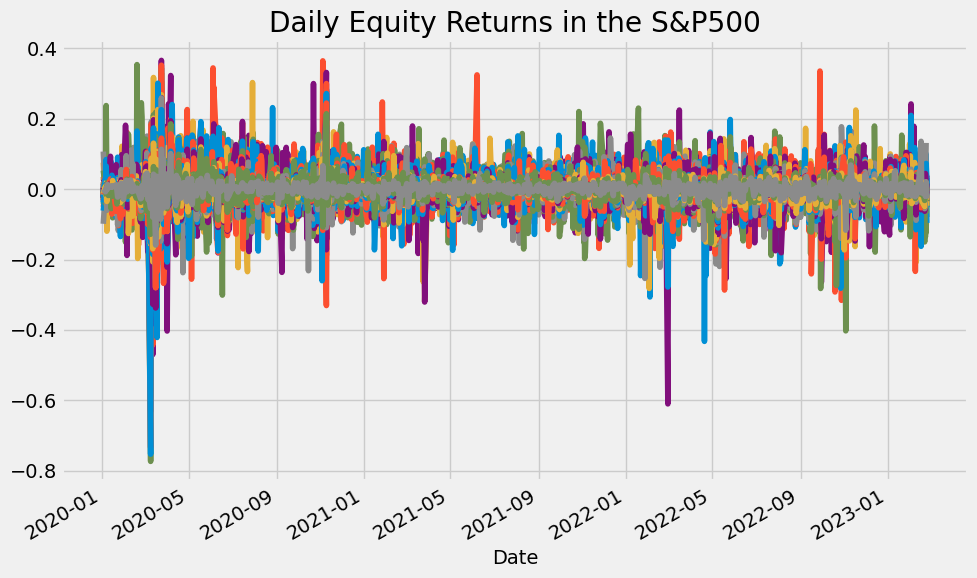

In [18]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
daily_returns.plot(legend=0, figsize=(10,6), grid=True, title='Daily Equity Returns in the S&P500')
plt.tight_layout()

Calculate cumulative returns (change in price over time) and create graph of the cumulative equity returns.

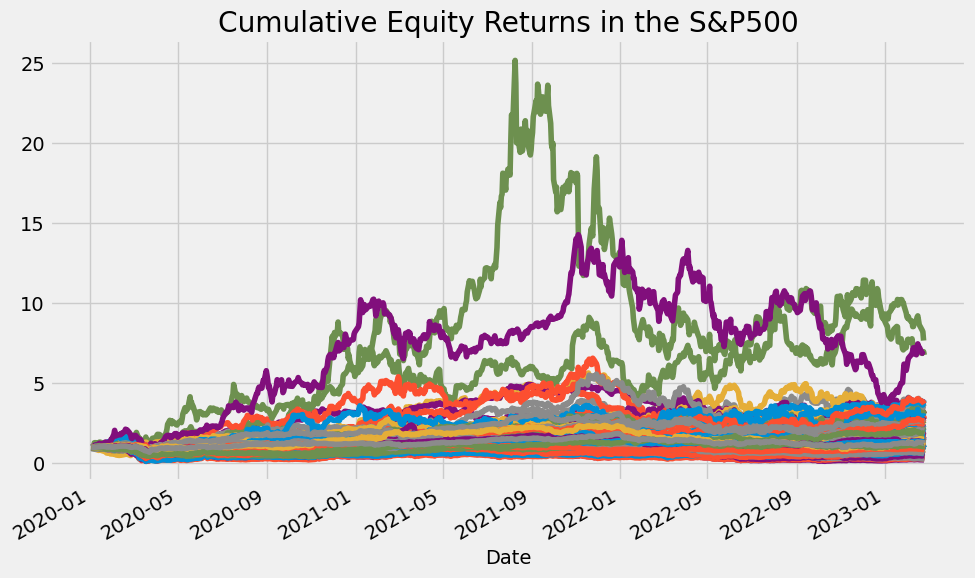

In [19]:
cumulative_returns = daily_returns.cumsum().apply(np.exp)
cumulative_returns.plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Equity Returns in the S&P500')
plt.tight_layout()

Principal component analysis on the daily equity returns. 

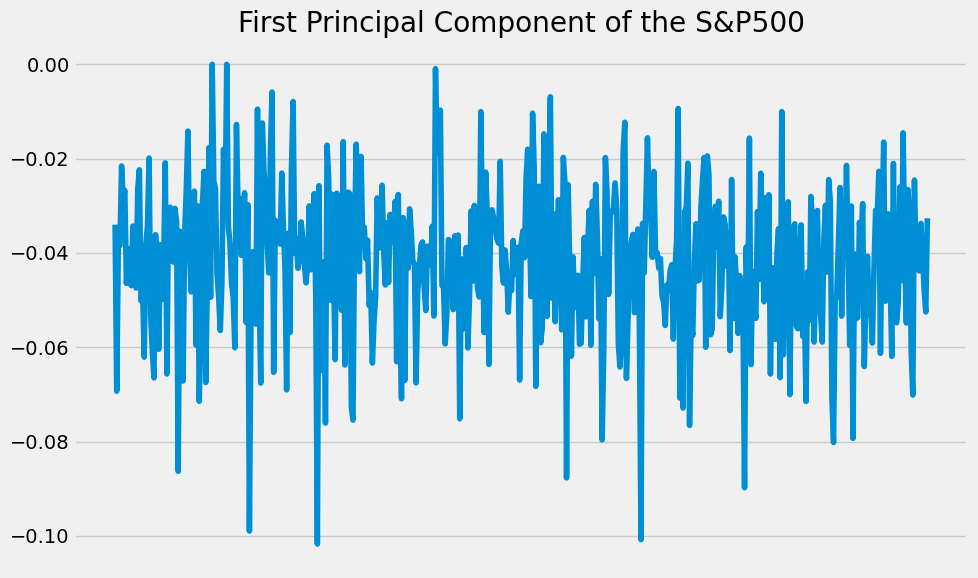

In [23]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(daily_returns.fillna(0))

first_pc = pd.Series(index=daily_returns.columns, data=pca.components_[0])

first_pc.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

Calculate first eigenvector loadings.

<Axes: xlabel='Date'>

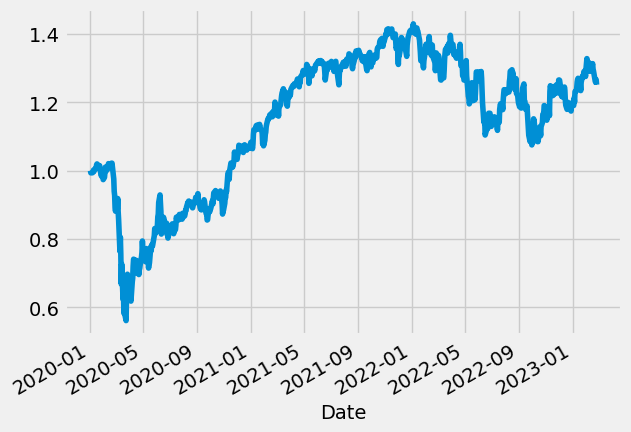

In [25]:
weights = abs(first_pc)/sum(abs(first_pc))
weighted_daily_returns = (weights*daily_returns).sum(1)
weighted_daily_returns.cumsum().apply(np.exp).plot()

Use SP&500 portfolio daily returns as beta for first component portfolio.

In [26]:
sp_prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


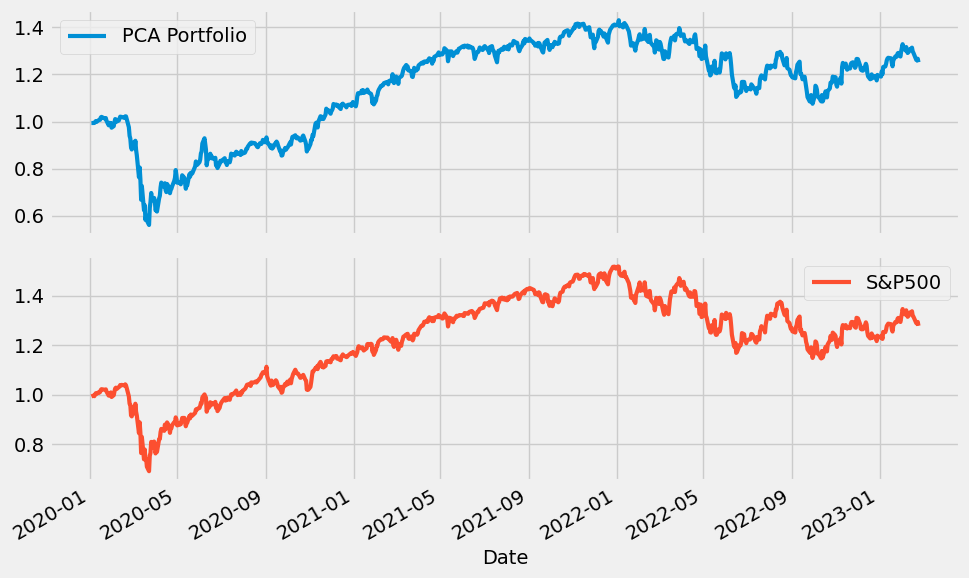

In [28]:
daily_retuns_df = pd.concat([weighted_daily_returns, sp_prices.apply(np.log).diff(1)],axis=1)
daily_retuns_df.columns = ["PCA Portfolio", "S&P500"]

daily_retuns_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()

Construct eigen-portfolio using 10 stocks with least nagative weights and compare to SP&500.

In [ ]:
weighted_daily_returns = daily_returns[pc1.nlargest(10).index].mean(1)
weighted_daily_returns.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
sp_prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')